In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split


In [7]:
wine=pd.read_csv("winequality-red.csv")
wine.columns
wine.shape
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


In [9]:
bins=(2,6.5,8)
grp_names=['bad','good']
wine['quality']=pd.cut(wine['quality'],bins=bins,labels=grp_names)
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [10]:
label_qua=LabelEncoder()

In [11]:
wine['quality']=label_qua.fit_transform(wine['quality'])

In [12]:
wine.tail(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1576,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,0
1577,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,0
1578,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,0
1579,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,0
1580,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,0
1581,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,1
1582,7.2,0.390,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,0
1583,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,0
1584,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,0
1585,7.2,0.660,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,0


In [13]:
wine['quality'].value_counts()

0    1379
1     217
Name: quality, dtype: int64

C:\Users\91705\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

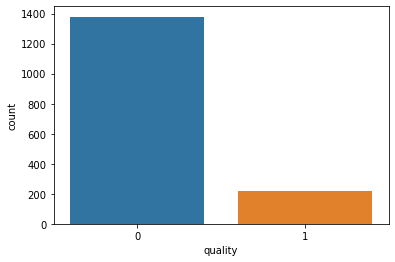

In [14]:
sns.countplot(wine['quality'])

In [15]:
X=wine.drop('quality',axis=1)
y=wine['quality']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
sc=StandardScaler()   #remove mean std variance
X_train=sc.fit_transform(X_train)  # calculate mean
X_test=sc.transform(X_test)

In [18]:
X_train[:10]

array([[-1.26843280e+00, -1.15992969e+00, -1.16552574e-01,
        -1.71339971e-01, -3.48419349e-01,  6.81596039e-01,
         3.32657330e-01, -2.10477887e-01,  7.05309843e-01,
         1.86378152e+00,  1.68143759e-01],
       [ 1.62417171e-01, -1.10356109e+00,  6.56962079e-01,
         4.45196336e-02, -1.02169773e-01,  3.60552501e-03,
         6.33146325e-01,  5.78436588e-01, -7.01410306e-02,
        -1.07728849e+00, -9.62562098e-01],
       [ 1.82220314e+00, -1.18811399e+00,  1.37890909e+00,
        -3.15246374e-01, -8.16489746e-02, -1.06180814e+00,
        -9.59445345e-01,  1.04437265e+00, -2.13801003e+00,
         2.43191925e-01, -1.15101307e+00],
       [ 1.87943714e+00, -2.86216417e-01,  6.56962079e-01,
        -8.18918784e-01,  6.19966116e-02, -9.64952352e-01,
        -5.68809653e-01,  1.65447802e-01, -1.55642187e+00,
        -5.69172591e-02, -3.65800677e-01],
       [ 3.34119167e-01, -2.58032117e-01,  1.32734145e+00,
         1.05186445e+00,  2.67204592e-01, -1.25551972e+00,
  

In [19]:
rfc = RandomForestClassifier(n_estimators=200)  #no.of trees
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)

In [20]:
pred_rfc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       277
           1       0.79      0.44      0.57        43

    accuracy                           0.91       320
   macro avg       0.86      0.71      0.76       320
weighted avg       0.90      0.91      0.90       320

[[272   5]
 [ 24  19]]


# SVM classifier

In [22]:
clf=svm.SVC()
clf.fit(X_train,y_train)
pred_clf=clf.predict(X_test)

In [23]:
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       277
           1       0.69      0.26      0.37        43

    accuracy                           0.88       320
   macro avg       0.79      0.62      0.65       320
weighted avg       0.87      0.88      0.86       320

[[272   5]
 [ 32  11]]


# neural network

In [26]:
mlpc =MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train,y_train)
pred_mlpc=mlpc.predict(X_test)

C:\Users\91705\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       277
           1       0.57      0.56      0.56        43

    accuracy                           0.88       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.88      0.88      0.88       320

[[259  18]
 [ 19  24]]


In [29]:
from sklearn.metrics import accuracy_score
cm=accuracy_score(y_test,pred_rfc)
cm

0.909375